# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

# Read Data

In [2]:
train_data=pd.read_csv('Train_Data.csv')
test_data=pd.read_csv('Test_Data.csv')

# Show 5 frist Row

In [3]:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


# Describe Data

In [4]:
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


# Show Data info

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


# Show Data corr

In [6]:
train_data.corr()

,age,bmi,children,charges
age,1.000000,0.143527,-0.061076,0.299692
bmi,0.143527,1.000000,-0.041996,0.211325
children,-0.061076,-0.041996,1.000000,-0.075089
charges,0.299692,0.211325,-0.075089,1.000000


# Display Data corr

<AxesSubplot:>

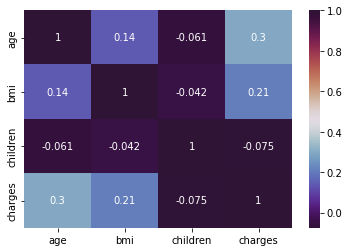

In [7]:
sns.heatmap(train_data.corr(),annot=True,cmap='twilight_shifted')

# Show Data contain null data

In [8]:
data=pd.DataFrame(train_data.isnull().sum(),columns=['Number of null'])
data['percentage']=(train_data.isnull().sum())/len(train_data)*100
data

,Number of null,percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
smoker,0,0.0
region,0,0.0
children,0,0.0
charges,0,0.0


# Show data contain duplicate data

In [9]:
train_data.duplicated().sum()

679

# Show distribution of sex

<AxesSubplot:xlabel='sex', ylabel='count'>

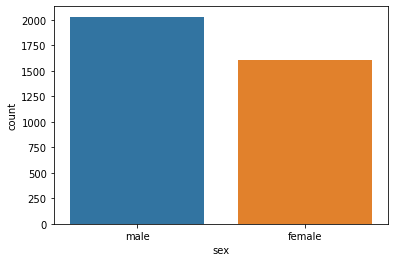

In [10]:
sns.countplot(x='sex',data=train_data)


# Show distribution of sex

<AxesSubplot:xlabel='smoker', ylabel='count'>

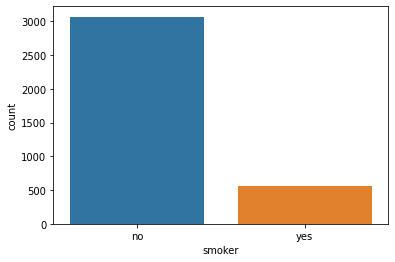

In [11]:
sns.countplot(x="smoker", data=train_data)

# show relationship between smoker and sex

<AxesSubplot:xlabel='smoker', ylabel='count'>

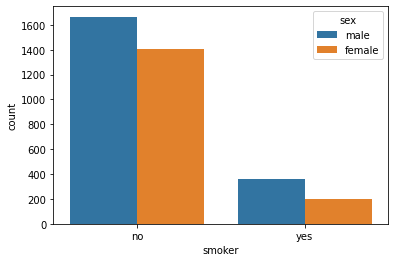

In [12]:
sns.countplot(x="smoker", hue="sex", data=train_data)

# Show distribution of region

<AxesSubplot:xlabel='region', ylabel='count'>

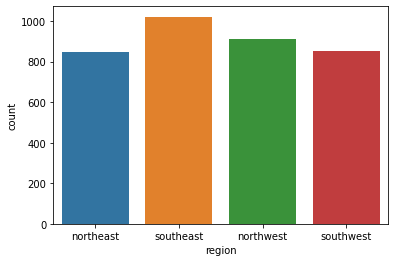

In [13]:
sns.countplot(x="region", data=train_data)

# show relationship between region and sex

<AxesSubplot:xlabel='sex', ylabel='count'>

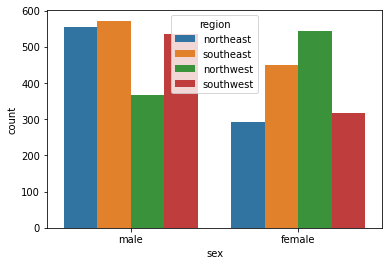

In [14]:
sns.countplot(x="sex", hue="region", data=train_data)

# show relationship between smoker and region

<AxesSubplot:xlabel='smoker', ylabel='count'>

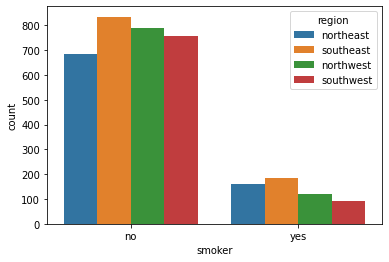

In [15]:
sns.countplot(x="smoker", hue="region", data=train_data)

# Show input X and output y

In [16]:
X=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]

# Show X

In [17]:
X

,age,sex,bmi,smoker,region,children
0,21.000000,male,25.745000,no,northeast,2
1,36.976978,female,25.744165,yes,southeast,3
2,18.000000,male,30.030000,no,southeast,1
3,37.000000,male,30.676891,no,northeast,3
4,58.000000,male,32.010000,no,southeast,1
...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4
3626,38.661977,female,26.202557,no,southeast,2
3627,56.000000,male,40.300000,no,southwest,0
3628,48.061207,female,34.930624,no,southeast,1


# Show y

In [18]:
y

0        3279.868550
1       21454.494239
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324964
3626    11735.844352
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64

# Show object columns

In [19]:
col=train_data.select_dtypes(include=object).columns
pd.DataFrame(col,columns=['object'])

,object
0,sex
1,smoker
2,region


# Transform X

In [20]:
label=LabelEncoder()
for c in col:
    X[c]=label.fit_transform(X[c])
    test_data[c]=label.fit_transform(test_data[c])
X

,age,sex,bmi,smoker,region,children
0,21.000000,1,25.745000,0,0,2
1,36.976978,0,25.744165,1,2,3
2,18.000000,1,30.030000,0,2,1
3,37.000000,1,30.676891,0,0,3
4,58.000000,1,32.010000,0,2,1
...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4
3626,38.661977,0,26.202557,0,2,2
3627,56.000000,1,40.300000,0,3,0
3628,48.061207,0,34.930624,0,2,1


# Split Data

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,shuffle=True,random_state=33)
print(X_train.shape)
print(y_train.shape)

(2432, 6)
(2432,)


# Applying Linear Regression Model 

In [26]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

# Calculating Details

In [27]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))

Linear Regression Train Score is :  0.7218763412331757


# Applying Random Forest Regressor Model 

In [28]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=300,max_depth=20, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=33)

In [29]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorModel = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)
print('Random Forest Regressor Train Score is:', RandomForestRegressorModel.score(X_train, y_train))


Random Forest Regressor Train Score is: 0.985320523612953


# Calculating Details

In [30]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))

Random Forest Regressor Train Score is :  0.985320523612953


# Applying DecisionTreeRegressor Model 

In [31]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=10,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=33)

# Calculating Details

In [32]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))

DecisionTreeRegressor Train Score is :  0.9682729072329567


# Display RandomForestRegressorModel.feature_importances_

In [33]:
#plt.bar(X.keys(),RandomForestRegressorModel.feature_importances_)

# Calculating Prediction

In [34]:
y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [ 8616.2258361   2661.40761173  8809.78494106  9899.33673862
  1752.0665845   2794.72598699  4867.01788978 26125.72656443
 15379.3263213  10963.80238713]


# Calculating Mean Absolute Error

In [35]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  1609.967211179692


# Calculating Mean Squared Error

In [36]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  13851655.373824056


# Calculating Median Absolute Error

In [37]:
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Median Absolute Error Value is :  350.6274913244224


# predict test_data

In [38]:
y_test=RandomForestRegressorModel.predict(test_data)

In [39]:
len(test_data)

492

In [40]:
value = LinearRegressionModel.predict(test_data)
print("result : "+str(value))

result : [ 8628.40619902 10431.39959098 12207.61864124 10611.77595207
 40599.55462437  9800.97162193 10844.9369128  10205.91268904
  3179.71997522 13056.95664543  5844.27491914  6781.792608
  9480.60522629  5588.44390071  2470.69744614  6394.23236092
  3744.64811032 15030.58662573 13953.1249603   7240.22503402
  9810.3205873  13849.20891902 34078.90701911 12978.16290885
 12727.30895203 13072.68168338 12528.36126679  9406.66174885
  8236.08786786 12577.48581145  4096.78406696 10533.80616531
  5218.6279105  11117.56547902  3980.206437    8283.30826733
 28060.29614702  6073.53343012  7844.97868152  4402.30287383
 33149.83302821  8045.93551509 11619.75269937  9589.41260193
  9466.9555936   6334.11425045 13632.40249093  8221.77037064
 11582.55186601 33434.87346615 10176.60652404  7797.79671687
 13444.95756673  7496.2026334  14031.53249568  3565.34787863
 13202.11701259 15350.65931777  9259.56430119 10859.07740259
 15425.78787062  7239.45182445 35620.50271173  6498.54329605
  7119.90987014 1

# transform y_test into csv

In [41]:
submision=pd.DataFrame(y_test,columns=['prediction'])
submision.to_csv('prediction.csv')
submision

,prediction
0,7238.994629
1,9520.821647
2,13113.147668
3,6853.140999
4,40293.073260
...,...
487,16315.884555
488,6662.828702
489,12656.298580
490,9416.598946


In [43]:
from IPython.display import FileLink

# Create a sample DataFrame (replace this with your data)

# Save the DataFrame to a CSV file
csv_filename = 'sample_data1.csv'
X.to_csv(csv_filename, index=False)

# Display a link to download the CSV file
display(FileLink(csv_filename))

C:\Users\vega ramesh\Desktop\project today\Medical _insurance_charges\sample_data1.csv

In [46]:
import pandas as pd

# Replace 'your_file_path' with the actual path to your CSV file
file_path = 'C:\Users\vega ramesh\Downloads\sample_data1 (2).csv'
delimiter = ';'  # Replace ';' with the actual delimiter used in your CSV file

# Read the CSV file using pandas
data_frame = pd.read_csv(file_path, delimiter=delimiter)
data_frame


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-46-a3f062aea097>, line 4)

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Actual class labels
actual = ["Cat", "Cat", "Dog", "Cat", "Dog", "Dog", "Cat", "Dog", "Cat", "Dog"]

# Predicted class labels by your model
predicted = ["Cat", "Dog", "Dog", "Cat", "Dog", "Dog", "Cat", "Cat", "Dog", "Dog"]

# Create a confusion matrix
cm = confusion_matrix(actual, predicted, labels=["Cat", "Dog"])

# Calculate metrics
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label="Cat")
recall = recall_score(actual, predicted, pos_label="Cat")
f1 = f1_score(actual, predicted, pos_label="Cat")

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
[[3 2]
 [1 4]]

Accuracy: 0.7
Precision: 0.75
Recall: 0.6
F1-Score: 0.6666666666666665
